In [1]:
import pandas as pd
pd.set_option("display.height", 10)
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_colwidth", 1000)
pd.set_option("display.width", 2000)

height has been deprecated.



In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sample = pd.read_csv('./sample_with_header.csv')

In [4]:
sample

,SichterGruppe,SichterName,Host,kind,Datetime,Content,Url,Authorid,Tag,entryid,Id,TwistId,TopicId,TopicName,IsInitialEntry,IsPrivate
0,NaN,NaN,twitter.com,1,21.10.2016 23:18:00,HighTechno ! Ich will Claras WG mal so richtig zu #Elektro dancen sehen . https://t.co/oLKYDGHBGQ,https://twitter.com/Carina42008/status/789576493810737152#aid=1394595750,3796107.0,NaN,bc6c4c70-a00d-429d-8bde-4e7afa072a15,31796013,04b9f324-5cee-4dd3-8387-0ff934ec1472,551631,Alle,False,False
1,NaN,NaN,twitter.com,3,21.10.2016 23:18:00,"Yeah , der WG gefällt deine Musik . Hol dir auch superschnelles Internet ! https://t.co/0dPArCUv0b https://t.co/HHRZaAQnte http://pbs.twimg.com/amplify_video_thumb/0123456789001234567890/img/QEQntlwB_ifYH3Gv.jpg",https://twitter.com/telekomerleben/status/789576496071446528#aid=20459730,1060906.0,NaN,5a676fbd-f7c7-45b1-8744-3a7fd8ebc9e9,31795989,04b9f324-5cee-4dd3-8387-0ff934ec1472,551631,Alle,True,False
2,Sichter FB/TW,Hotspot,www.facebook.com,1,24.09.2016 14:57:02,"Muss ich mit Hotspot registrieren wlan to go auf meinem Handy zu gehen , weiß ich nicht , wie es zu tun ich bin Telekom Kunde",https://www.facebook.com/122768271103611/posts/1141448189235609#pid=122768271103611&uid=122768271103611_1141448189235609&aid=992943974115174&vid=2&wid=122768271103611,7707299.0,NaN,94e8d4f1-60c1-45e5-894a-c11a3ff7b655,30744441,0be928df-7378-421e-be6e-07269f1dac19,551631,Alle,True,False
3,NaN,NaN,www.facebook.com,3,24.09.2016 15:12:35,"Hallo Fiona . Wenn Sie für WLAN TO GO angemeldet sind , dann können Sie unsere HotSpots nutzen in dem Sie sich mit Ihrer T-Online E-Mail-Adresse und dem dazugehörigen Passwort ( das gleiche wie für das Kundencenter ) anmelden . Viele Grüße Christian We .",https://www.facebook.com/122768271103611/posts/1141448189235609#pid=122768271103611_1141448189235609&uid=1141448189235609_1141458792567882&cpid=&aid=122768271103611&vid=2&wid=122768271103611,254017.0,NaN,263da5f3-4f0c-4a3e-ac27-358eb033912f,30744872,0be928df-7378-421e-be6e-07269f1dac19,551631,Alle,False,False
4,NaN,NaN,www.facebook.com,4,24.09.2016 15:16:45,"ich bin nicht gemeldet , es ok ich vergesse es",https://www.facebook.com/122768271103611/posts/1141448189235609#pid=122768271103611_1141448189235609&uid=1141448189235609_1141461172567644&cpid=1141448189235609_1141458792567882&aid=992943974115174&vid=2&wid=122768271103611,7707299.0,NaN,51a8de05-48e4-4422-822f-50aba72fb5f5,30745002,0be928df-7378-421e-be6e-07269f1dac19,551631,Alle,False,False
5,Sichter FB/TW,Hotspot,www.facebook.com,4,24.09.2016 15:18:01,"Jetzt muss ich mal eins fragen . Ich kann doch nicht mit Wlan to go alle Hotspots der Telekom kostenfrei nutzen , oder ? Was ich weiss nur die Hotspots der teilnehmenden Partner / Telekomkunden der Fa . Fon",https://www.facebook.com/122768271103611/posts/1141448189235609#pid=122768271103611_1141448189235609&uid=1141448189235609_1141461895900905&cpid=&aid=1096037533756491&vid=2&wid=122768271103611,127469.0,NaN,a255ed96-818f-42b2-84f1-0c0c7e2581da,30745045,0be928df-7378-421e-be6e-07269f1dac19,551631,Alle,False,False
6,NaN,NaN,www.facebook.com,4,24.09.2016 15:18:01,"Jetzt muss ich mal eins fragen . Ich kann doch nicht mit Wlan to go alle Hotspots der Telekom kostenfrei nutzen , oder ? Was ich weiss nur die Hotspots der teilnehmenden Partner / Telekomkunden der Fa . Fon",https://www.facebook.com/122768271103611/posts/1141448189235609#pid=122768271103611_1141448189235609&uid=1141448189235609_1141461895900905&cpid=&aid=1096037533756491&vid=2&wid=122768271103611,127469.0,NaN,a255ed96-818f-42b2-84f1-0c0c7e2581da,30745045,0be928df-7378-421e-be6e-07269f1dac19,551631,Alle,False,False
7,NaN,NaN,www.facebook.com,4,24.09.2016 15:19:10,ich weis nicht wie es geht :(,https://www.facebook.com/122768271103611/posts/1141448189235609#pid=122768271103611_1141448189235609&uid=1141448189235609_1141462655900829&cpid=1141448189235609_1141458792567882&aid=992943974115174&vid=2&wid=122768271103611,7707299.0,NaN,53632505-a61d-423e-bfc2-9f2047ad75b1,30745129,0be928df-7378-421e-be6e-

In [5]:
sample.query('kind==1 and SichterName').Content

2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Muss ich mit Hotspot registrieren wlan to go auf meinem Handy zu gehen , weiß ich nicht , wie es zu tun ich bin Telekom

In [6]:
pd.unique(sample.SichterName)

array([nan, 'Hotspot', 'Festnetz', 'Mobilfunk', 'GK', 'MMS', 'A-Team',
       'Mobile'], dtype=object)

In [7]:
import spacy

In [9]:
nlp = spacy.load('de')

In [10]:
sent = nlp('Ich heiße Oguz.')

In [11]:
for word in sent:
    print(word.pos_)

PRON
VERB
PROPN
PUNCT


In [62]:
documents = [] # Content
labels = [] # SichterName
tags = [] # Tag

filtered = sample.query('kind==1 and SichterName and Tag!="abgelegt durch Sichter" and Tag!="#Apfel"')
for (idx, row) in filtered.iterrows():
    labels.append(row.SichterName)
    documents.append(nlp(row.Content))
    tags.append(row.Tag)

print(len(documents))

22


In [13]:
prios = np.array(tags)
prios = np.array(prios == 'Prio-Fall', dtype=int)
prios

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
labels[0], documents[0], prios[0]

('Hotspot',
 Muss ich mit Hotspot registrieren wlan to go auf meinem Handy zu gehen , weiß ich nicht , wie es zu tun ich bin Telekom Kunde,
 0)

In [15]:
from collections import Counter
# create lemma lists filter punctuation and numbers
# from spacy
lemmas = [word.lemma_ for words in documents for word in words if word.pos_ not in ['PUNCT','NUM']]
counts = Counter(lemmas)

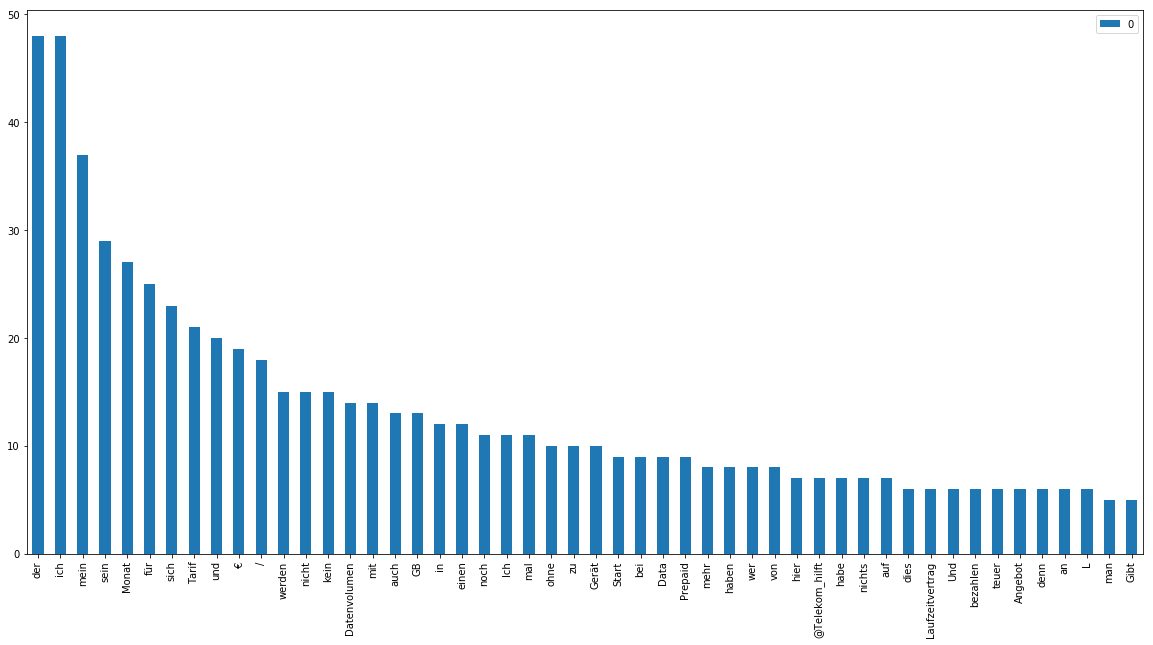

In [16]:
lemma_df = pd.DataFrame.from_dict(counts, orient='index')
lemma_df.sort_values(by=0,ascending=False).head(50).plot(kind='bar', figsize=(20,10))

# Feature Analysis

Text(0.5,0,'number of words')

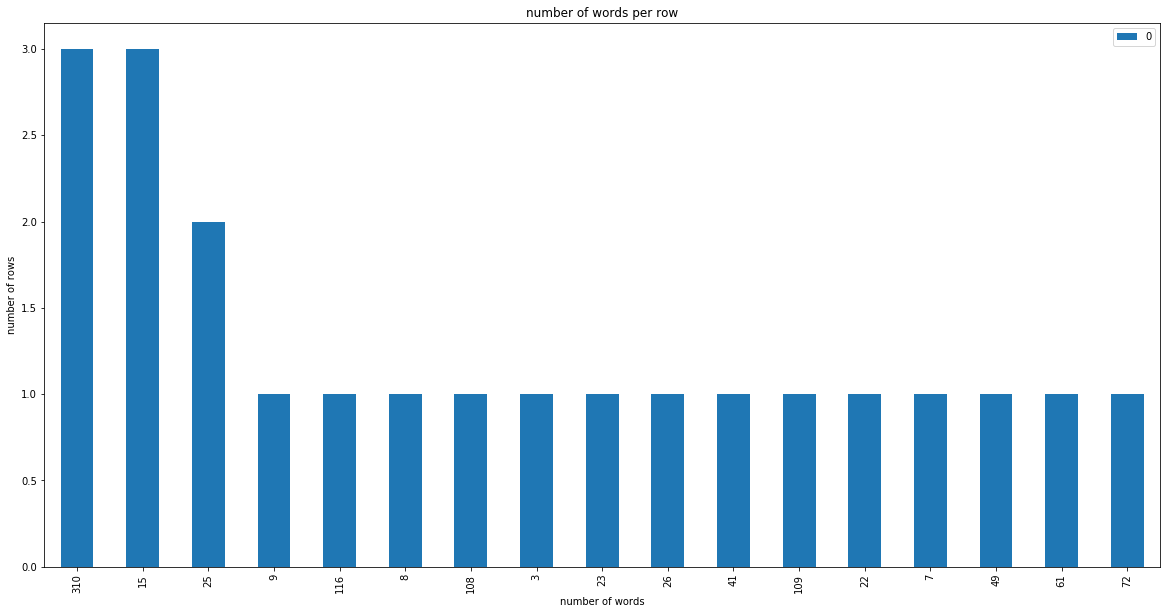

In [34]:
lemmas = [len(words) for words in documents]
word_counts = Counter(lemmas)

lemma_df = pd.DataFrame.from_dict(word_counts, orient='index')
a = lemma_df.sort_values(by=0,ascending=False).head(50).plot(kind='bar', figsize=(20,10))
a.set_title('number of words per row')
a.set_ylabel('number of rows')
a.set_xlabel('number of words')

Text(0.5,0,'number of words')

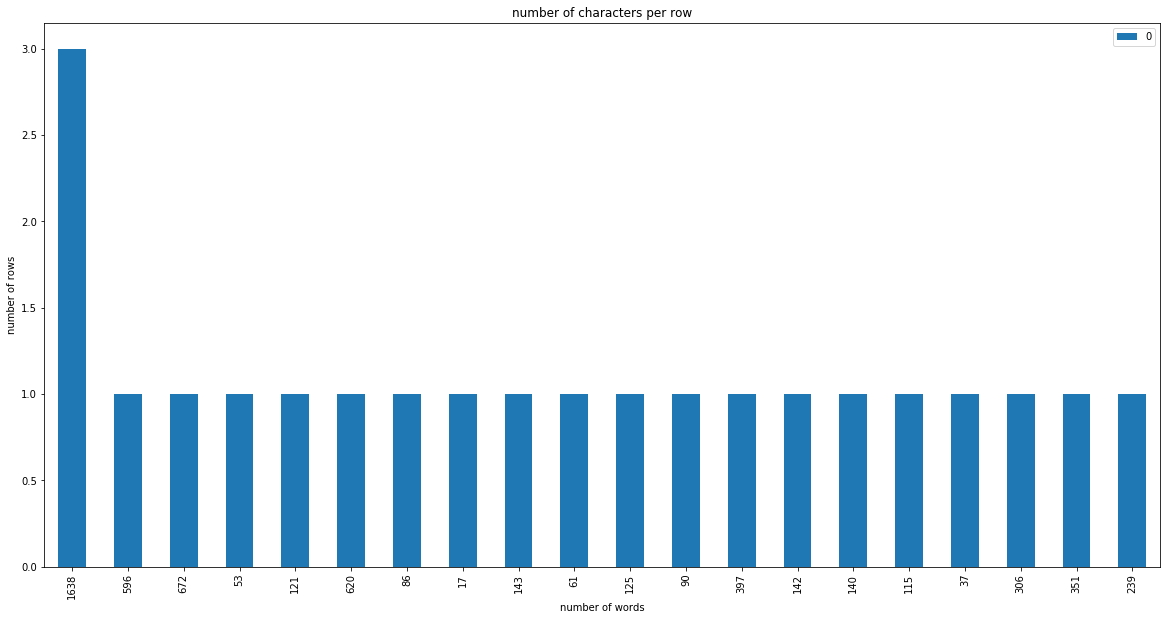

In [35]:
lemmas = ([len(document.text) for document in documents])
word_counts = Counter(lemmas)

lemma_df = pd.DataFrame.from_dict(word_counts, orient='index')
a = lemma_df.sort_values(by=0,ascending=False).head(50).plot(kind='bar', figsize=(20,10))
a.set_title('number of characters per row')
a.set_ylabel('number of rows')
a.set_xlabel('number of words')

(-0.5, 1439.5, 1079.5, -0.5)

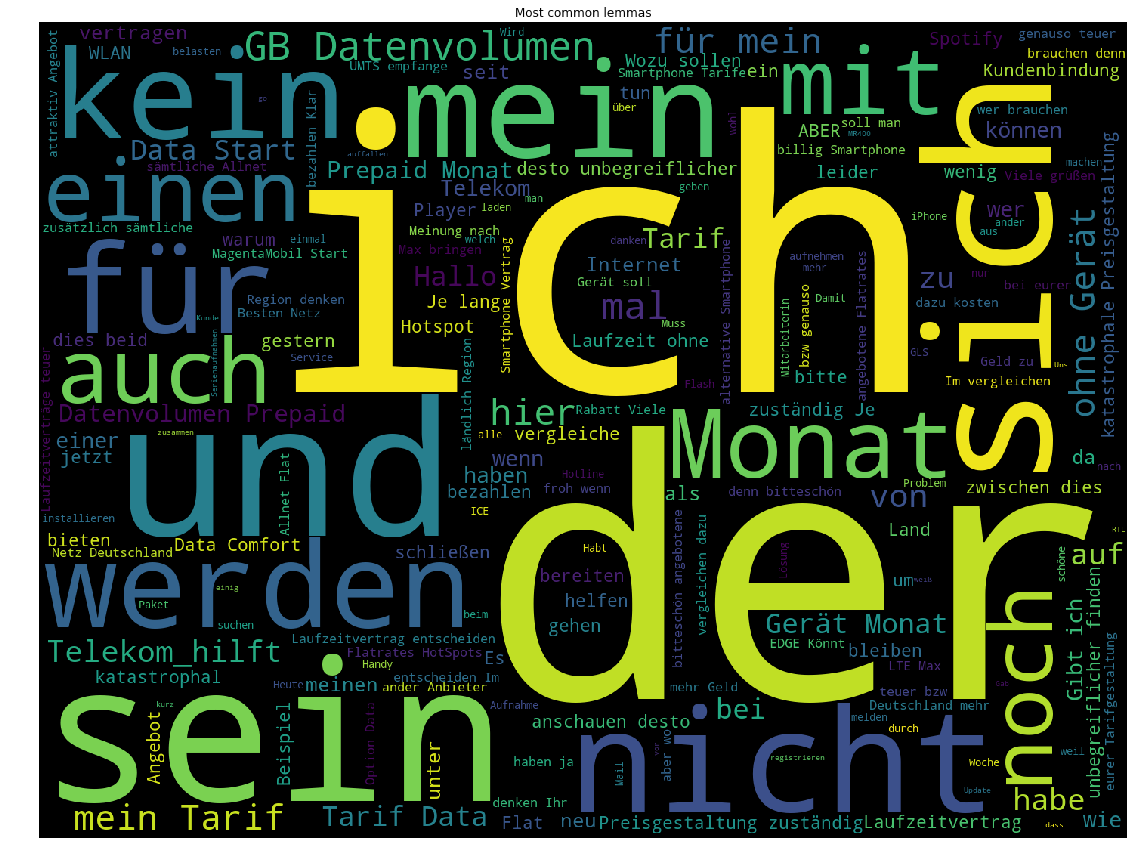

In [44]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join([word.lemma_ for document in documents for word in document]))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.title('Most common lemmas')
plt.axis('off')

In [45]:
with open('./stopwords-de.txt') as f:
    stopwords = f.read().split('\n')

(-0.5, 1439.5, 1079.5, -0.5)

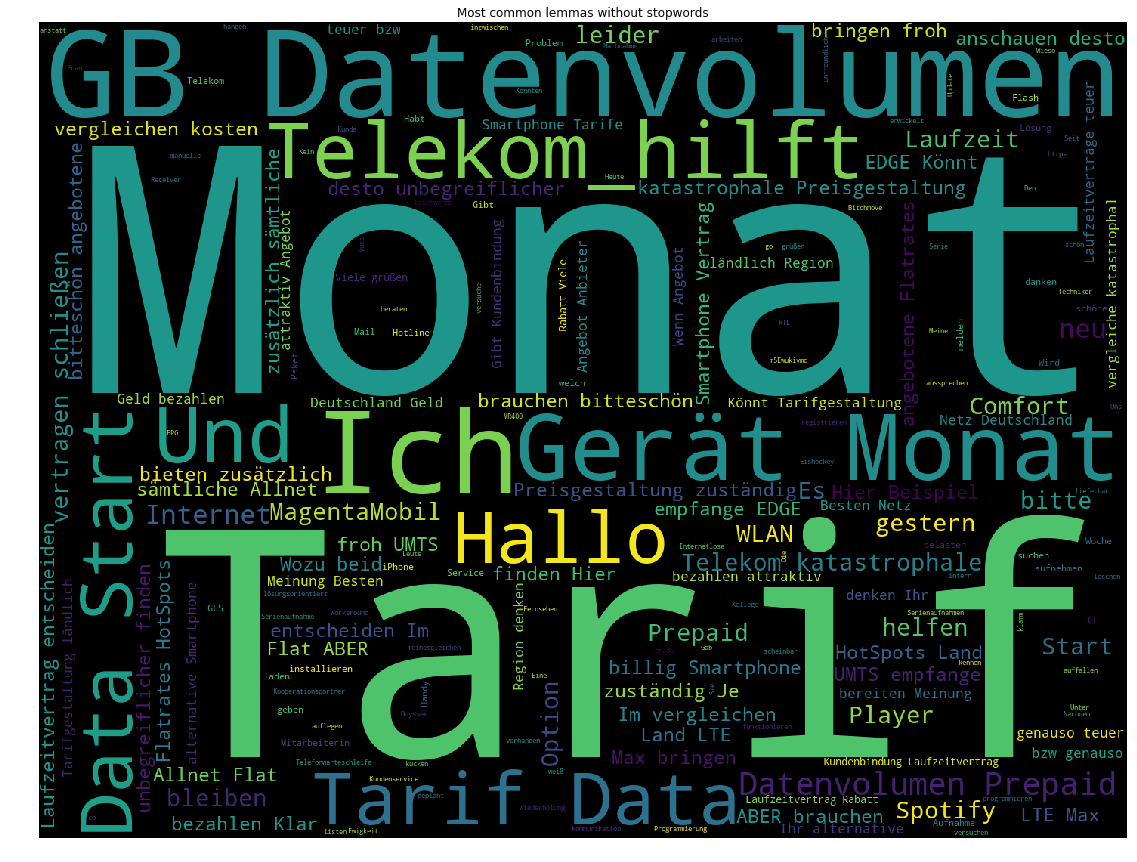

In [49]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join([word.lemma_ for document in documents for word in document if word.lemma_ not in stopwords]))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.title('Most common lemmas without stopwords')
plt.axis('off')

In [63]:
qmarks = np.mean(filtered.Content.apply(lambda x: '?' in x))
math = np.mean(filtered.Content.apply(lambda x: '€' in x))
fullstop = np.mean(filtered.Content.apply(lambda x: '.' in x))
capital_first = np.mean(filtered.Content.apply(lambda x: x[0].isupper()))
capitals = np.mean(filtered.Content.apply(lambda x: max([y.isupper() for y in x.split(' ')])))
numbers = np.mean(filtered.Content.apply(lambda x: max([y.isdigit() for y in x])))

print('Rows with question marks: {:.2f}%'.format(qmarks * 100))
print('Rows with €: {:.2f}%'.format(math * 100))
print('Rows with full stops: {:.2f}%'.format(fullstop * 100))
print('Rows with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Rows with capital letters: {:.2f}%'.format(capitals * 100))
print('Rows with numbers: {:.2f}%'.format(numbers * 100))

Rows with question marks: 63.64%
Rows with €: 18.18%
Rows with full stops: 63.64%
Rows with capitalised first letters: 72.73%
Rows with capital letters: 45.45%
Rows with numbers: 59.09%


In [19]:
# TODO: try different sets of stopwords (e.g. with or without kein, nicht)

In [102]:
# wordvectors:
w2v = [word.vector for word in row if word.text not in stopwords]

# average w2v
X = np.array([np.mean(w2v, axis=0) for row in documents])

In [ ]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer()
X_bag = 

In [103]:
Y = np.array(prios,dtype=int)

In [104]:
# Code for cross-validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import class_weight
from sklearn.metrics import f1_score

# Create 2 folds
k = 2
kfold = StratifiedKFold(Y, k, shuffle=True, random_state=0)

results = np.zeros(k)

# iterate over two folds
for i, (train_ind, test_ind) in enumerate(kfold):
    X_train, X_val, Y_train, Y_val = X[train_ind], X[test_ind], Y[train_ind], Y[test_ind]
    gnb = GaussianNB()

    weights = class_weight.compute_sample_weight('balanced', [0,1], Y_train)
    weightss = []
    for y in Y_train:
        weightss.append(weights[y])

    predictions = gnb.fit(X_train, Y_train, sample_weight=weightss).predict(X_val)
    results[i] = f1_score(predictions, Y_val)
    print('f1 score: {}'.format(results[i]))
    print('accuracy: {}\%'.format(sum(predictions==Y_val)/len(Y_val)*100))

f1 score: 0.0
accuracy: 90.9090909090909\%
f1 score: 0.0
accuracy: 90.9090909090909\%


/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [105]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

ModuleNotFoundError: No module named 'xgboost'